## Ερώτηση 3 | 3.Η

Η υπόθεση μου αφορά τα εστιατόρια που έχουν πολλές κατηγορίες προϊόντων, πως κατά μέσο όρο θα έχουν καλύτερα star ratings από αυτά που έχουν λιγότερες. Αυτό μπορεί να είναι πολύ χρήσιμο έναν επιχειρηματία που θέλει να δει αν αξίζει να προσθέσει μια καινούργια κατηγορία προϊόντων στο εστιατόριο του.

In [1]:
import pandas as pd
import scipy as sp 
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df_res =  pd.read_csv('restaurants.csv')
df_res.shape
df_res.categories[0]

'Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries'

In [3]:
df_res["num_categories"] = df_res.categories.apply(lambda c : len(c.split(',')))
df_res = df_res[["num_categories", "stars"]]
df_res = pd.DataFrame(df_res.groupby(by="num_categories")["stars"].mean())
df_res["num_categories"] = df_res.index
df_res.reset_index(drop=True, inplace=True)
print(df_res.shape)
df_res.head()

(19, 2)


,stars,num_categories
0,3.500000,1
1,3.547362,2
2,3.532103,3
3,3.493678,4
4,3.573227,5


<AxesSubplot:xlabel='num_categories', ylabel='stars'>

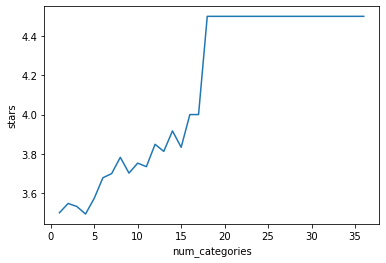

In [4]:
sns.lineplot(data=df_res, x = "num_categories", y = "stars")

Βλεπουμε πως οσο αυξανονται οι κατηγοριες αυξανονται και αστερια των καταστηματων. Θα δουμε μεχρι τις 15 κατηγοριες γιατι το πληθος καταστηματων με περισσοτερες απο 15 ειναι χαμηλο.

<AxesSubplot:xlabel='num_categories', ylabel='stars'>

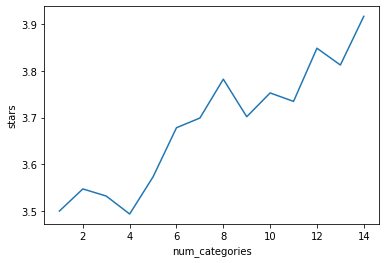

In [5]:
sns.lineplot(data=df_res[df_res.num_categories < 15], x = "num_categories", y = "stars")

Εδω φαινεται καλυτερα πως οσο αυξανεται το πληθος κατηγοριων αυξανεται σημαντικα και το πληθος αστεριων.
Τωρα, θα δουμε αν αυτη η αυξηση ειναι στατιστικα σημαντικη.

                   stars  num_categories
stars           1.000000        0.904639
num_categories  0.904639        1.000000


<AxesSubplot:>

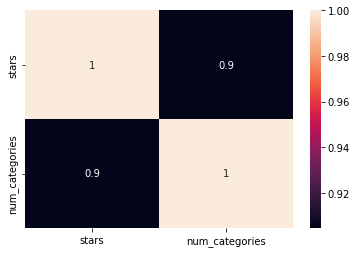

In [6]:
print(df_res.corr())
sns.heatmap(df_res.corr(), annot=True)

In [7]:
print(stats.pearsonr(df_res.num_categories, df_res.stars))


(0.9046385213095056, 1.0519304933653965e-07)


## Τελικά Συμπεράσματα
Μπορούμε να δούμε πως το p-value είναι πολύ μικρότερο από το a = 0.05 , αρά είμαστε πολύ σίγουροι ότι τα αποτελέσματα δεν είναι τυχαία και υπάρχει συσχέτιση μεταξύ των αστερίων και του πλήθους κατηγοριών του εστιατορίου. Θα προτείναμε στο καταστηματάρχη να προσθέσει καινούργια κατηγορία προϊόντων.